# <font color='black'>Alisando o Pib por id_municipio do brasil</font>

## <font color='black'>Feito Por:João Pedro Monnteiro



In [25]:
#primeiro importamos os pacotes que iremos usar
import numpy as np
import pandas as pd
import seaborn as sb
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [17]:
df_dsa = pd.read_csv('../../bases_de_dados/br_pib_municipio.csv')

In [18]:
df_dsa .head()

,id_municipio,ano,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,1200500,2002,125410.0,2474.0,122936.0,42357.0,8335.0,20708.0,51537.0
1,1300300,2002,76039.0,1632.0,74407.0,34073.0,3678.0,8944.0,27712.0
2,1302108,2002,13798.0,324.0,13474.0,1568.0,388.0,1203.0,10315.0
3,1400175,2002,38787.0,918.0,37868.0,4671.0,2536.0,4567.0,26095.0
4,1502400,2002,498849.0,58905.0,439944.0,18100.0,80539.0,239642.0,101663.0


In [19]:
df_dsa.groupby('pib')['id_municipio'].sum()

pib
-19046.0        2404507
 2384.0         2209450
 2720.0         2210383
 3020.0         2210375
 3039.0         2204154
                 ...   
 698952189.0    3550308
 714663604.0    3550308
 746909330.0    3550308
 763597808.0    3550308
 828980608.0    3550308
Name: id_municipio, Length: 94842, dtype: int64

In [20]:
df_dsa.groupby('pib')['id_municipio'].max()

pib
-19046.0        2404507
 2384.0         2209450
 2720.0         2210383
 3020.0         2210375
 3039.0         2204154
                 ...   
 698952189.0    3550308
 714663604.0    3550308
 746909330.0    3550308
 763597808.0    3550308
 828980608.0    3550308
Name: id_municipio, Length: 94842, dtype: int64

<Figure size 1000x500 with 0 Axes>

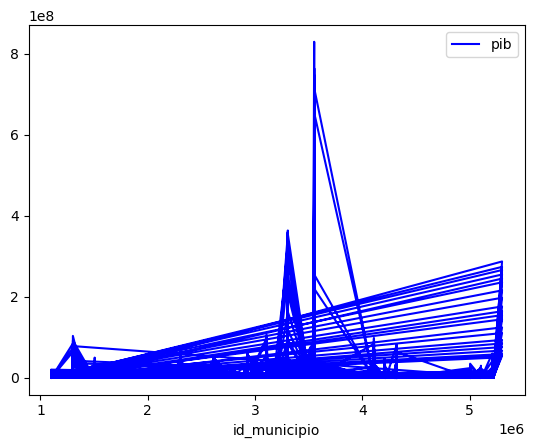

In [57]:
#aqui importamos um grafico aonde fica claro a diferença do pib do id_municipio:3
plt.figure(figsize = (10,5))
df_dsa.plot(x = 'id_municipio', y= 'pib', color = 'blue')
plt.show()

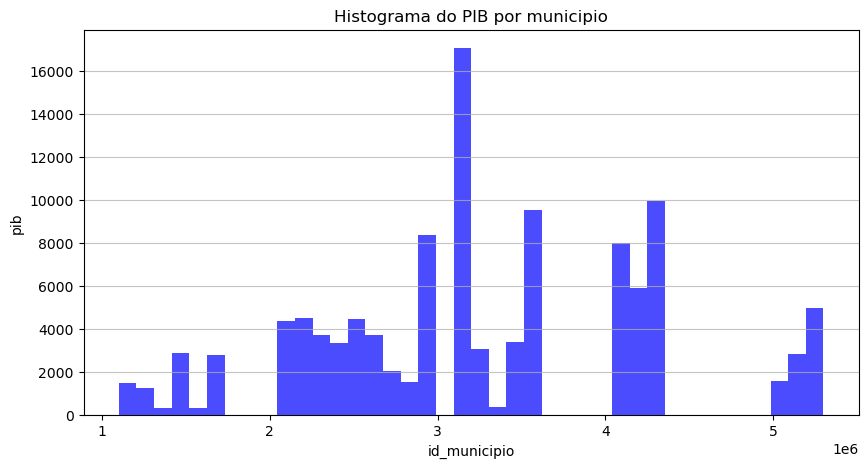

In [69]:
#aqui podemos ver por meio de um histograma a diferença real entre o pib do id municipio: 3
plt.figure(figsize=(10, 5))
plt.hist(df_dsa['id_municipio'], bins=40, color='blue', alpha=0.7)  
plt.xlabel('id_municipio')
plt.ylabel('pib')
plt.title('Histograma do PIB por municipio')
plt.grid(axis='y', alpha=0.75)
plt.show()


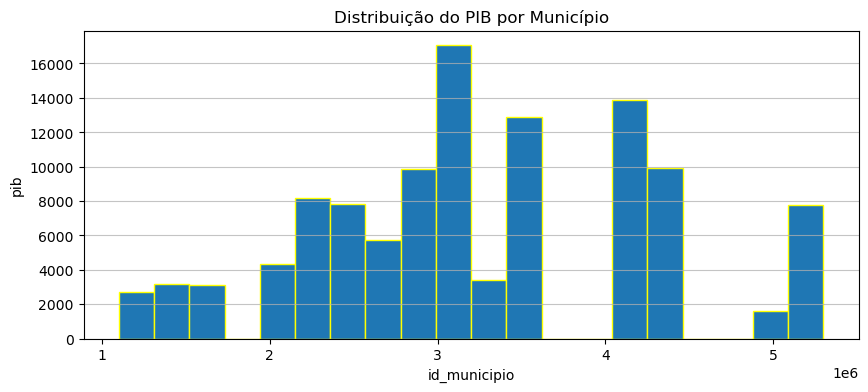

In [67]:
#podemos ver de outra maneira, o tanto que o id_municipio: 3 se destaca perante as outras
plt.figure(figsize=(10, 4))
plt.hist(df_dsa['id_municipio'], bins=20, edgecolor='yellow')
plt.xlabel('id_municipio')
plt.ylabel('pib')
plt.title('Distribuição do PIB por Município')
plt.grid(axis='y', alpha=0.75) 
plt.show()


In [11]:
####São Paulo, possui o maior Pib do brasil, basta voce pesquisar o id que ja esta fornecido, todo numero que começa por 3 que ja aparece sao paulo

In [13]:
#maior id por municipio do brasil esta localizado em:
maior_pib_id_ = df_dsa.loc[maior_pib_id, 'id_municipio']

print(f"O id com maior pib do brasil é: {maior_pib_id_}")


O id com maior pib do brasil é: 3550308


In [14]:
df_dsa.head()

,id_municipio,ano,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,1200500,2002,125410.0,2474.0,122936.0,42357.0,8335.0,20708.0,51537.0
1,1300300,2002,76039.0,1632.0,74407.0,34073.0,3678.0,8944.0,27712.0
2,1302108,2002,13798.0,324.0,13474.0,1568.0,388.0,1203.0,10315.0
3,1400175,2002,38787.0,918.0,37868.0,4671.0,2536.0,4567.0,26095.0
4,1502400,2002,498849.0,58905.0,439944.0,18100.0,80539.0,239642.0,101663.0



# <font color='black'>analisando estatisticamente os dados do pib do brasil</font>

In [26]:
df_dsa.corr()

,id_municipio,ano,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
id_municipio,1.000000e+00,-8.376078e-15,0.022409,0.018598,0.023160,0.154655,0.024882,0.018679,0.019339
ano,-8.376078e-15,1.000000e+00,0.043581,0.032186,0.045932,0.222841,0.058995,0.034170,0.048136
pib,2.240926e-02,4.358068e-02,1.000000,0.983243,0.999167,0.073319,0.833007,0.987767,0.751749
impostos_liquidos,1.859819e-02,3.218631e-02,0.983243,1.000000,0.974983,0.044853,0.804720,0.975028,0.693110
va,2.315970e-02,4.593173e-02,0.999167,0.974983,1.000000,0.079355,0.835520,0.986091,0.761429
va_agropecuaria,1.546550e-01,2.228412e-01,0.073319,0.044853,0.079355,1.000000,0.072962,0.046701,0.121115
va_industria,2.488210e-02,5.899456e-02,0.833007,0.804720,0.835520,0.072962,1.000000,0.776160,0.551116
va_servicos,1.867899e-02,3.417038e-02,0.987767,0.975028,0.986091,0.046701,0.776160,1.000000,0.675717
va_adespss,1.933904e-02,4.813632e-02,0.751749,0.693110,0.761429,0.121115,0.551116,0.675717,1.000000


In [29]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111400 entries, 0 to 111399
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_municipio       111400 non-null  int64  
 1   ano                111400 non-null  int64  
 2   pib                111326 non-null  float64
 3   impostos_liquidos  111326 non-null  float64
 4   va                 111326 non-null  float64
 5   va_agropecuaria    111326 non-null  float64
 6   va_industria       111326 non-null  float64
 7   va_servicos        111326 non-null  float64
 8   va_adespss         111326 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 7.6 MB


In [31]:
df_dsa.columns

Index(['id_municipio', 'ano', 'pib', 'impostos_liquidos', 'va',
       'va_agropecuaria', 'va_industria', 'va_servicos', 'va_adespss'],
      dtype='object')

C:\Users\marce\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='id_municipio', ylabel='Count'>

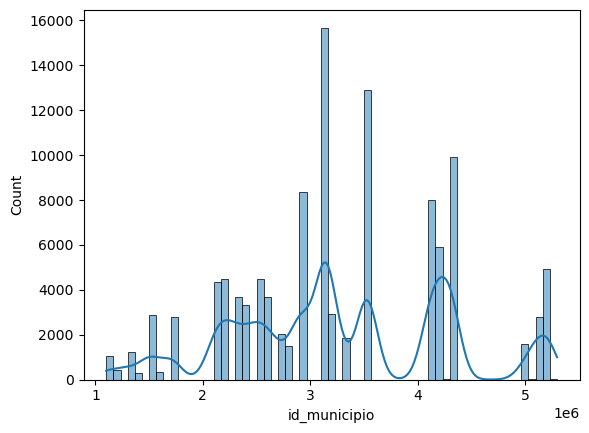

In [33]:
sb.histplot(data = df_dsa, x = 'id_municipio', kde = True)

<Axes: xlabel='id_municipio', ylabel='pib'>

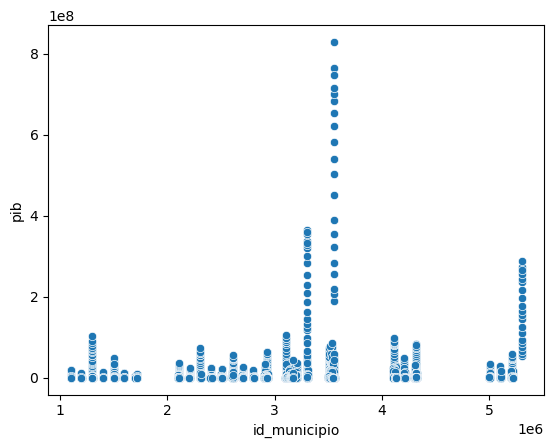

In [36]:
sb.scatterplot(data = df_dsa, x = 'id_municipio', y ='pib')

# <font color='black'>após está analise, podemos dizer que o municipio que tem o maior pib do brasil começa por 3, logo o resultando é no municipio de são paulo</font>


# <font color='black'>Conclusão</font>
# <font color='purple'>logo podemos concluir que o maior municipio por pib do brasil é o estado de SP, que possui  o maior pib por municipio brasileiro, aproximadamente na casa dos 800 milhões</font>
